In [1]:
%pylab inline
import glob
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


In [2]:
#This cell looks at the folder that the notebook is in an creates a list of all excel files.
path = '*.xlsx' #Reads in all Excel files
files = glob.glob(path) #creates a list of all the excel files
files

['structure_004_08.xlsx',
 'structure_004_1.xlsx',
 'structure_004_1_5.xlsx',
 'structure_004_20.xlsx',
 'structure_004_3.xlsx',
 'structure_004_8.xlsx',
 'structure_01_08.xlsx',
 'structure_01_1.xlsx',
 'structure_01_1_5.xlsx',
 'structure_01_20.xlsx',
 'structure_01_3.xlsx',
 'structure_01_8.xlsx']

In [3]:
#This is just for reference
i = 0
for file in files:
    print(i, file)
    i+=1

0 structure_004_08.xlsx
1 structure_004_1.xlsx
2 structure_004_1_5.xlsx
3 structure_004_20.xlsx
4 structure_004_3.xlsx
5 structure_004_8.xlsx
6 structure_01_08.xlsx
7 structure_01_1.xlsx
8 structure_01_1_5.xlsx
9 structure_01_20.xlsx
10 structure_01_3.xlsx
11 structure_01_8.xlsx


In [4]:
#Creating a list for mass and the two Z values
M08 = [files[0], files[6]]
M1 = [files[1], files[7]]
M1_5 = [files[2], files[8]]
M3 = [files[4], files[10]]
M8 = [files[5], files[11]]
M20 = [files[3], files[9]]
Z004 = [files[0],files[1],files[2],files[3],files[4],files[5]]
Z01 = [files[6],files[7],files[8],files[9],files[10],files[11]]

In [5]:
#This is how the data is formatted in the excel spreadsheet with the index value 
#0  Lagrangian mass coordinate (M☉)
#1	Radius coordinate (R☉)
#2	Luminosity (L☉)
#3	Total pressure (N m-2)
#4	Density (kg m-3)
#5	Temperature (K)
#6	Specific internal energy (J kg-1)
#7	Specific entropy (J K-1 kg-1)
#8	Specific heat at constant pressure (J K-1 kg-1)
#9	First adiabatic exponent
#10	Adiabatic temperature gradient
#11	Mean molecular weight (see note below)
#12	Electron number density (m-3)
#13	Electron pressure (N m-2)
#14	Radiation pressure (N m-2)
#15	Radiative temperature gradient
#16	Material temperature gradient
#17	Convective velocity (m s-1)
#18	Rosseland mean opacity (m2 kg-1)
#19	Power per unit mass from all nuclear reactions, excluding neutrino losses (W kg-1)
#20	Power per unit mass from PP chain (W kg-1)
#21	Power per unit mass from CNO cycle (W kg-1)
#22	Power per unit mass from triple-alpha reaction (W kg-1)
#23	Power loss per unit mass in nuclear neutrinos (W kg-1)
#24	Power loss per unit mass in non-nuclear neutrinos (W kg-1)
#25	Power per unit mass from gravitational contraction (W kg-1)
#26	Hydrogen mass fraction (all ionization stages)
#27	Molecular hydrogen mass fraction
#28	Singly-ionized hydrogen mass fraction
#29	Helium mass fraction (all ionization stages)
#30	Singly-ionized helium mass fraction
#31	Doubly-ionized helium mass fraction
#32	Carbon mass fraction
#33	Nitrogren mass fraction
#34	Oxygen mass fraction
#35	Electron degeneracy parameter

In [6]:
#df[0] = Mass
#df[1] = Radius
#df[2] = Luminosity
#df[3] = Pressure
#df[5] = Temperature
#This function plots the necessary data to answer 10.27 (a)
def PLOT(files):
    figure(figsize=(16,16)) #Sets the figure size so that they are more visible
    for file in files: #goes through all the files
        df = pd.read_excel(file, header = None) #open the current file
        
        #Plotting the pressure vs Radius graph
        subplot(221)
        title("Pressure vs Radius")
        xlabel("Radius (R☉)")
        ylabel("Pressure (N m-2)")        
        plot(df[1],df[3])
        
        #Creating the legend
        customLines = [Line2D([0], [0], color = 'b', lw=4),
                Line2D([0], [0], color = 'orange', lw=4)]
        legend(customLines, ['Z = 0.004', 'Z = 0.01'])

        #Plotting the mass vs radius
        subplot(222)
        title("Mass vs Radius")
        xlabel("Radius (R☉)")
        ylabel("Mass (M☉)")
        plot(df[1],df[0])
        legend(customLines, ['Z = 0.004', 'Z = 0.01'])
        
        #Plotting the Luminosity vs radius
        subplot(223)
        title("Luminosity vs Radius")
        xlabel("Radius (R☉)")
        ylabel("Luminosity (L☉)")
        plot(df[1],df[2])
        legend(customLines, ['Z = 0.004', 'Z = 0.01'])

        #Plotting the Temperature vs radius
        subplot(224)
        title("Temperature vs Radius")
        xlabel("Radius (R☉)")
        ylabel("Temperature (K)")
        plot(df[1],df[5])
        legend(customLines, ['Z = 0.004', 'Z = 0.01'])
        

In [7]:
#This function returns the index value in the temperature array such that at that same location is also the location of
#the desired percent luminoisty of the stars surface luminosity (10.27 (b))
#NOTE: The inc is set to 100 because in the high mass stars (8M☉ and 20M☉) the ranges are larger. However, because
#of the bestIndex, which finds the smallest index, it still works for the smaller mass stars, albiet the function
#has to go through more iterations to do it, but hey it works.
def findTempAtLum(df,perc):
    surfaceLuminosity = df[2].iloc[0] #Gets the surface luminosity (first entry)
    inc = 100 #this is the threshold that we want to find it in
    index = 0 #Incremented later to get the correct index for the temperature array
    best = 100 #Because the threshold allows for more than one element to be what we are looking for, this helps narrow it down
    bestIndex = 0 #This ends up being the final index
    #Search through the entire luminosity array
    for i in df[2]: 
        #If the luminosity is in the correct range
        if (i + inc > perc*surfaceLuminosity) and (i - inc < perc*surfaceLuminosity):
            #If the percent - (currentLuminosity/surfaceLuminosity) is the smallest value so far
            if (abs(perc - i/surfaceLuminosity) < abs(perc-best)):
                best = i/surfaceLuminosity
                bestIndex = index #Then we now have the best index
        index+=1
    return bestIndex

In [8]:
#This function looks at the velocites of the convection zones, and prints out the radial distance that it extends
#10.27 (d (iv))
def convZones(df):
    index = 0
    highestIndex = 0 #used to get the final index value
    first = True #Used to get initial radius
    ri = 0
    rf = 0
    for i in df[17]:
        if i > 40: #If the velocity is above a certain value
            if first == True: #Sets the final radius because first value is the surface
                rf = df[1].iloc[index] #final b
                first = False
            if (index > highestIndex):
                highestIndex = index #Gets the initial radius because last value is closer to the center of the star
        index+=1
    ri = df[1].iloc[highestIndex]
    print("The convective range is from",ri,"R☉ to",rf,"R☉")

In [9]:
#This function loops through all the files, and prints out the needed info for 10.27 (b,c,d)
def printData(files):
    first = True #The first data file will always be the Z = 0.004 case so we should print that title first
    #The next three variables are used to answer the questions for 10.28 a --> d
    maxCentralTemp = 0
    maxCentralDensity = 0
    maxEnergy = 0
    for file in files: #goes through all the files            
        df = pd.read_excel(file, header = None) #open the current file
        #If it is the Z=0.004 print, otherwise print for Z=0.01
        if first == True:
            maxCentralTemp = df[5].iloc[-1]
            maxCentralDensity = df[4].iloc[-1]
            maxEnergy = df[19].iloc[-1]
            print("For Z = 0.004:")
            helper(df)
            print()
            first = False
        else:
            CTZ,CDZ,EZ = test(df,maxCentralTemp,maxCentralDensity,maxEnergy)
            print("For Z = 0.01:")
            helper(df)
            print()    
        
    print()
    print("Z =",CTZ,"has the higher central temperature.")
    print("Z =",CDZ,"has the higher central density.")
    print("Z =",EZ,"has the higher energy generation.")

In [10]:
def test(df,maxCentralTemp,maxCentralDensity,maxEnergy):
    #Check for the higher max temperature
    if df[5].iloc[-1] > maxCentralTemp:
        CTZ = 0.01
    else:
        CTZ = 0.004

    #Check for the higher density
    if df[4].iloc[-1] > maxCentralDensity:
        CDZ = 0.01
    else:
        CDZ = 0.004

    #Check for the higher energy generation rate
    if df[19].iloc[-1] > maxEnergy:
        EZ = 0.01
    else:
        EZ = 0.004
    return CTZ,CDZ,EZ

In [11]:
#Just repeated code, so wrapped in a function simply just prints
def helper(df):
    index1 = findTempAtLum(df,0.99)
    index2 = findTempAtLum(df,0.5)
    print("Temperature at 99% surface value: ", df[5].iloc[index1], "K")
    print("Mr/M☉: ",df[0].iloc[index1]/df[0].iloc[0], "M☉")
    print("Temperature at 50% surface value: ", df[5].iloc[index2], "K")
    print("Mr/M☉: ",df[0].iloc[index2]/df[0].iloc[0], "M☉")
    print("Central Temperature: ", df[5].iloc[-1], "K")
    print("Central Density: ", df[4].iloc[-1], "kg m-3")
    convZones(df)
    print("Central Energy Generation Rate: ", df[19].iloc[-1], "W kg-1")
    print("Effective/Surface Temperature: ", df[5].iloc[0], "K")
    print("Radius: ", df[1].iloc[0], "R☉")

In [12]:
#This function plots L/L☉ vs M/M☉ and Log10(L/L☉) vs Log10(M/M☉) (10.27 (e))
def LvsM(files):
    figure(figsize=(16,8))
    x = array([]) #Used to collect the values of Log10(L/L☉) and Log10(M/M☉) for a polyfit
    y = array([])
    for file in files: #goes through all the files
        df = pd.read_excel(file, header = None)
        
        #Creates the plot for L/L☉ vs M/M☉
        subplot(121)
        title("L/L☉ vs M/M☉")
        xlabel("M/M☉")
        ylabel("L/L☉")
        plot(df[0].iloc[0],df[2].iloc[0], marker = 'o')
        
        #Creates the plot for Log10(L/L☉) vs Log10(M/M☉)
        subplot(122)
        title("Log10(L/Lsun) vs Log10(M/M☉)")
        xlabel("Log10(M/M☉)")
        ylabel("Log10(L/L☉)")
        plot(log10(df[0].iloc[0]),log10(df[2].iloc[0]), marker = 'o')
        
        #Gets the values for polyfit
        y = append(y, log10(df[2].iloc[0]))
        x = append(x,log10(df[0].iloc[0]))
    print("Alpha: ", polyfit(x,y,1)[0])

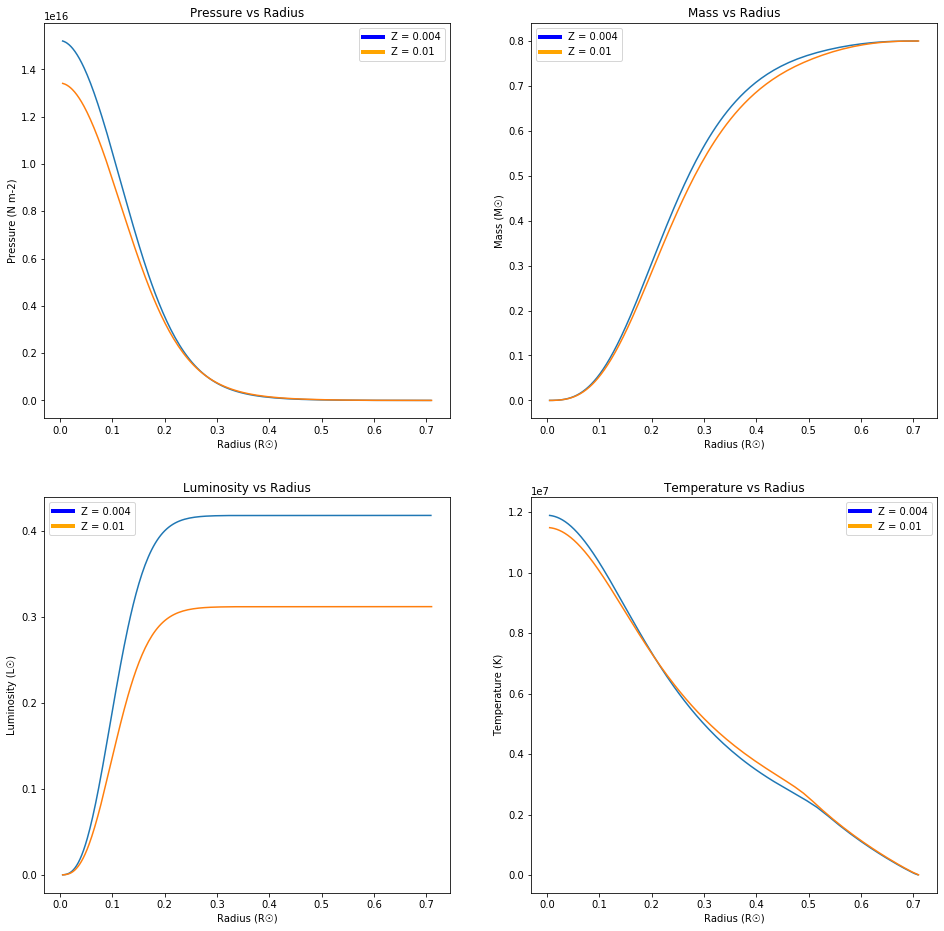

In [13]:
#For the 0.8M☉
PLOT(M08)

In [14]:
#For the 0.8M☉
printData(M08)

For Z = 0.004:
Temperature at 99% surface value:  6346431.09 K
Mr/M☉:  0.5190689637499999 M☉
Temperature at 50% surface value:  10185302.1 K
Mr/M☉:  0.08259306424999999 M☉
Central Temperature:  11896768.3 K
Central Density:  90622.0108 kg m-3
The convective range is from 0.599797146 R☉ to 0.708499001 R☉
Central Energy Generation Rate:  0.00107680268 W kg-1
Effective/Surface Temperature:  5516.96944 K
Radius:  0.708610087 R☉

For Z = 0.01:
Temperature at 99% surface value:  6158112.73 K
Mr/M☉:  0.5263929525 M☉
Temperature at 50% surface value:  9867435.24 K
Mr/M☉:  0.08077775525 M☉
Central Temperature:  11491546.1 K
Central Density:  84014.7957 kg m-3
The convective range is from 0.637951953 R☉ to 0.709763988 R☉
Central Energy Generation Rate:  0.000824507634 W kg-1
Effective/Surface Temperature:  5122.94959 K
Radius:  0.709904463 R☉


Z = 0.004 has the higher central temperature.
Z = 0.004 has the higher central density.
Z = 0.004 has the higher energy generation.


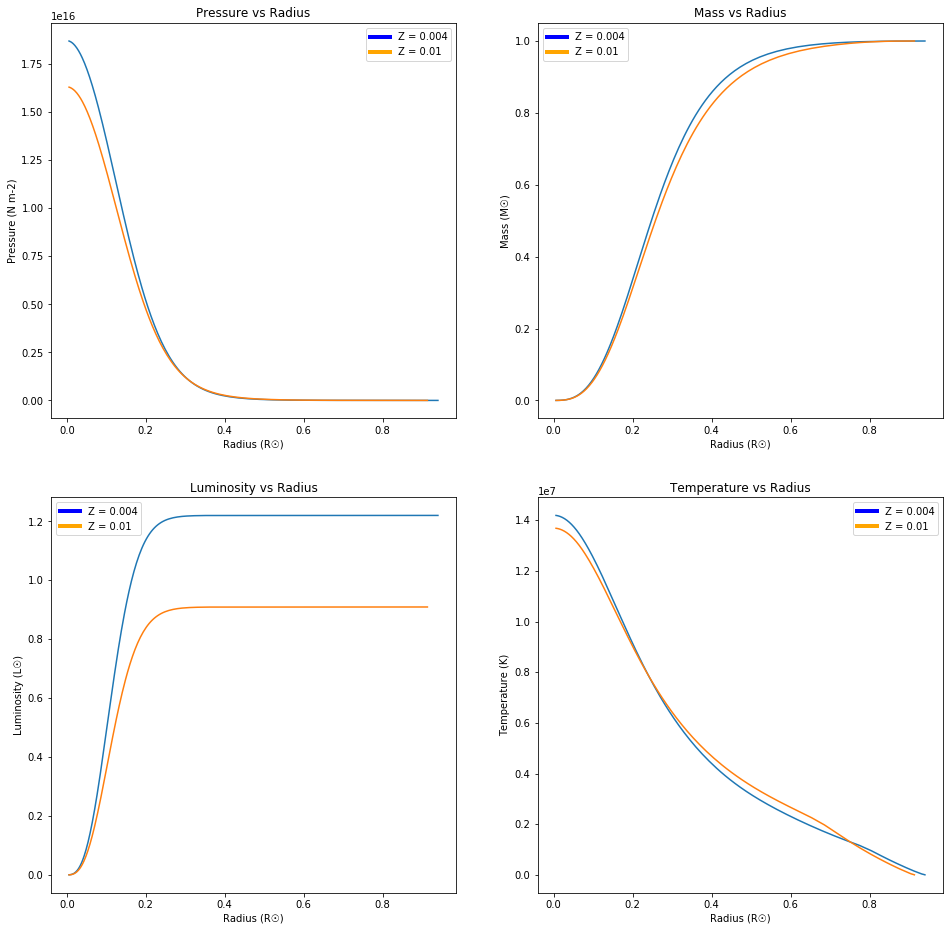

In [15]:
#For the 1M☉
PLOT(M1)

In [16]:
#For the 1M☉
printData(M1)

For Z = 0.004:
Temperature at 99% surface value:  7322056.41 K
Mr/M☉:  0.538755259 M☉
Temperature at 50% surface value:  12072187.9 K
Mr/M☉:  0.0858687173 M☉
Central Temperature:  14185880.4 K
Central Density:  93803.0594 kg m-3
The convective range is from 0.829489812 R☉ to 0.939834006 R☉
Central Energy Generation Rate:  0.00251348627 W kg-1
Effective/Surface Temperature:  6262.64676 K
Radius:  0.939969312 R☉

For Z = 0.01:
Temperature at 99% surface value:  7245309.72 K
Mr/M☉:  0.520299404 M☉
Temperature at 50% surface value:  11726497.7 K
Mr/M☉:  0.0783979737 M☉
Central Temperature:  13679017.3 K
Central Density:  86079.5833 kg m-3
The convective range is from 0.748938763 R☉ to 0.913143946 R☉
Central Energy Generation Rate:  0.00209935912 W kg-1
Effective/Surface Temperature:  5903.20978 K
Radius:  0.913293353 R☉


Z = 0.004 has the higher central temperature.
Z = 0.004 has the higher central density.
Z = 0.004 has the higher energy generation.


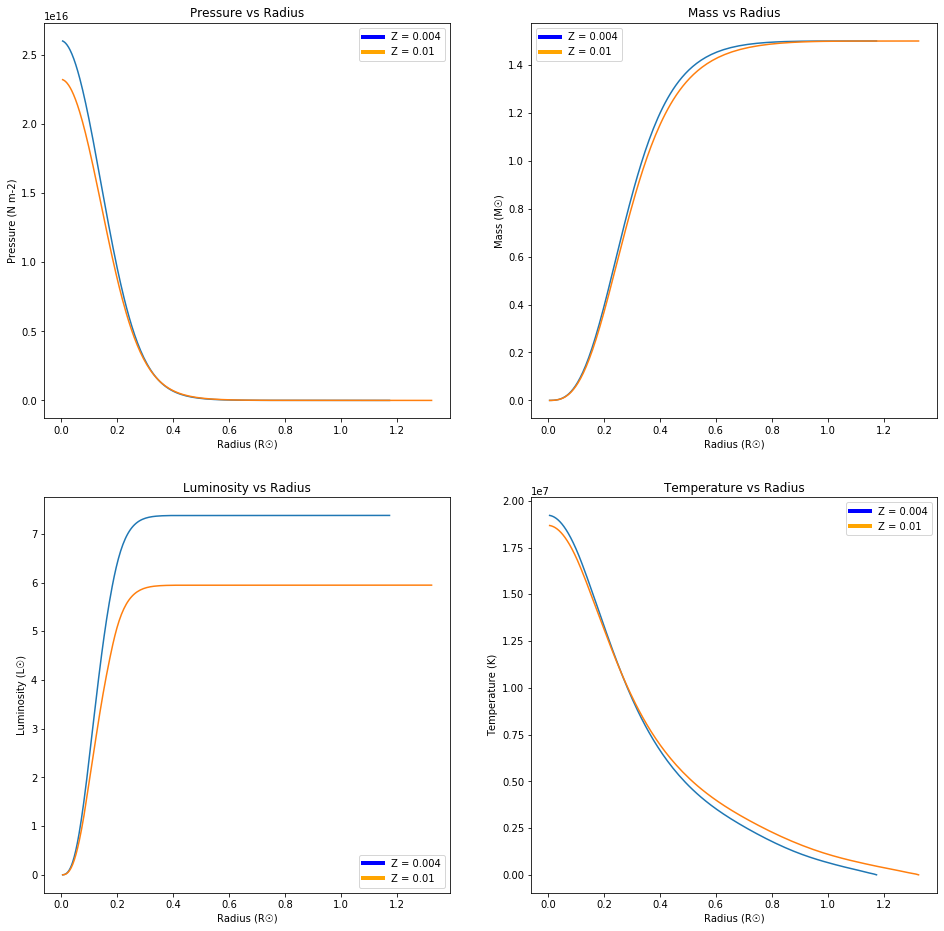

In [17]:
#For the 1.5M☉
PLOT(M1_5)

In [18]:
#For the 1.5M☉
printData(M1_5)

For Z = 0.004:
Temperature at 99% surface value:  9582952.62 K
Mr/M☉:  0.55817914 M☉
Temperature at 50% surface value:  16422991.9 K
Mr/M☉:  0.08273613333333334 M☉
Central Temperature:  19217453.9 K
Central Density:  96603.2424 kg m-3
The convective range is from 1.16533114 R☉ to 1.17393377 R☉
Central Energy Generation Rate:  0.0112925409 W kg-1
Effective/Surface Temperature:  8787.19154 K
Radius:  1.17404669 R☉

For Z = 0.01:
Temperature at 99% surface value:  9518077.17 K
Mr/M☉:  0.54217612 M☉
Temperature at 50% surface value:  15974491.0 K
Mr/M☉:  0.080077154 M☉
Central Temperature:  18678005.7 K
Central Density:  90023.4992 kg m-3
The convective range is from 1.31429165 R☉ to 1.32404974 R☉
Central Energy Generation Rate:  0.00996813834 W kg-1
Effective/Surface Temperature:  7839.72913 K
Radius:  1.324228 R☉


Z = 0.004 has the higher central temperature.
Z = 0.004 has the higher central density.
Z = 0.004 has the higher energy generation.


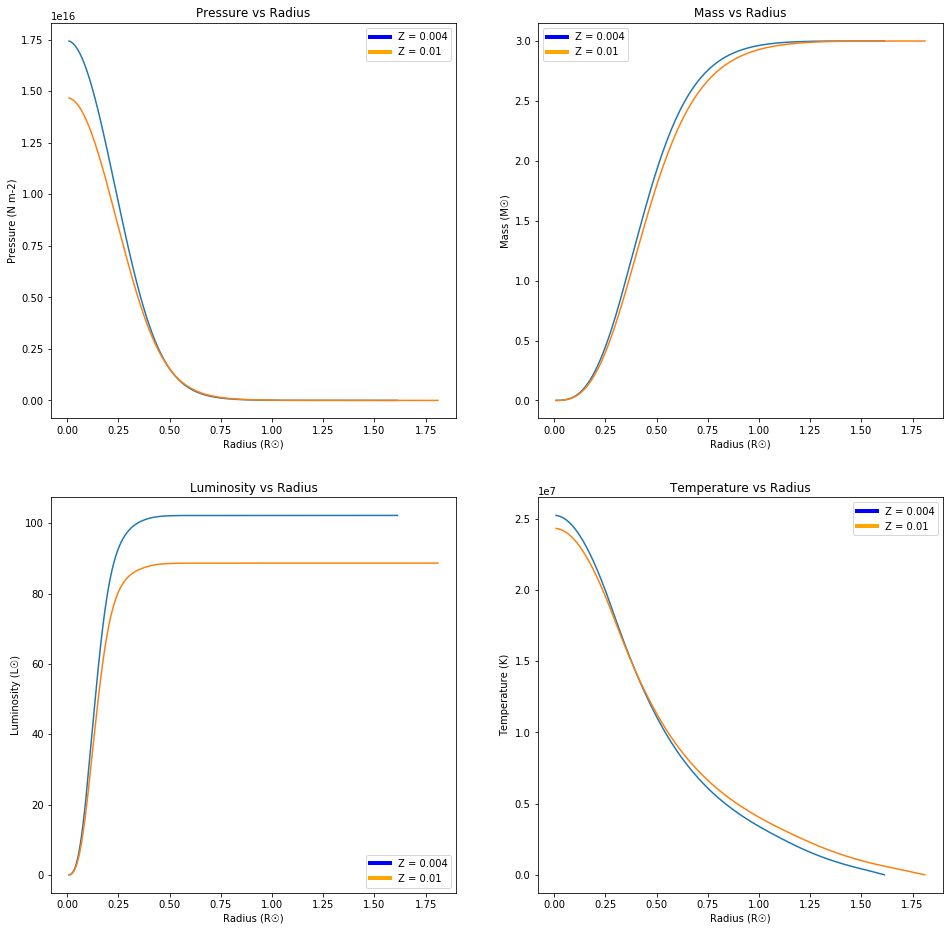

In [19]:
#For the 3M☉
PLOT(M3)

In [20]:
#For the 3M☉
printData(M3)

For Z = 0.004:
Temperature at 99% surface value:  14691209.6 K
Mr/M☉:  0.4104175433333333 M☉
Temperature at 50% surface value:  23463555.6 K
Mr/M☉:  0.029951372200000003 M☉
Central Temperature:  25217174.7 K
Central Density:  49367.5854 kg m-3
The convective range is from 0.00859643097 R☉ to 1.60608544 R☉
Central Energy Generation Rate:  0.236296434 W kg-1
Effective/Surface Temperature:  14464.2113 K
Radius:  1.61271525 R☉

For Z = 0.01:
Temperature at 99% surface value:  14354267.6 K
Mr/M☉:  0.39555823 M☉
Temperature at 50% surface value:  22734794.6 K
Mr/M☉:  0.0264275041 M☉
Central Temperature:  24304140.8 K
Central Density:  43717.0052 kg m-3
The convective range is from 0.00879187583 R☉ to 1.80210833 R☉
Central Energy Generation Rate:  0.217519482 W kg-1
Effective/Surface Temperature:  13174.6335 K
Radius:  1.81042993 R☉


Z = 0.004 has the higher central temperature.
Z = 0.004 has the higher central density.
Z = 0.004 has the higher energy generation.


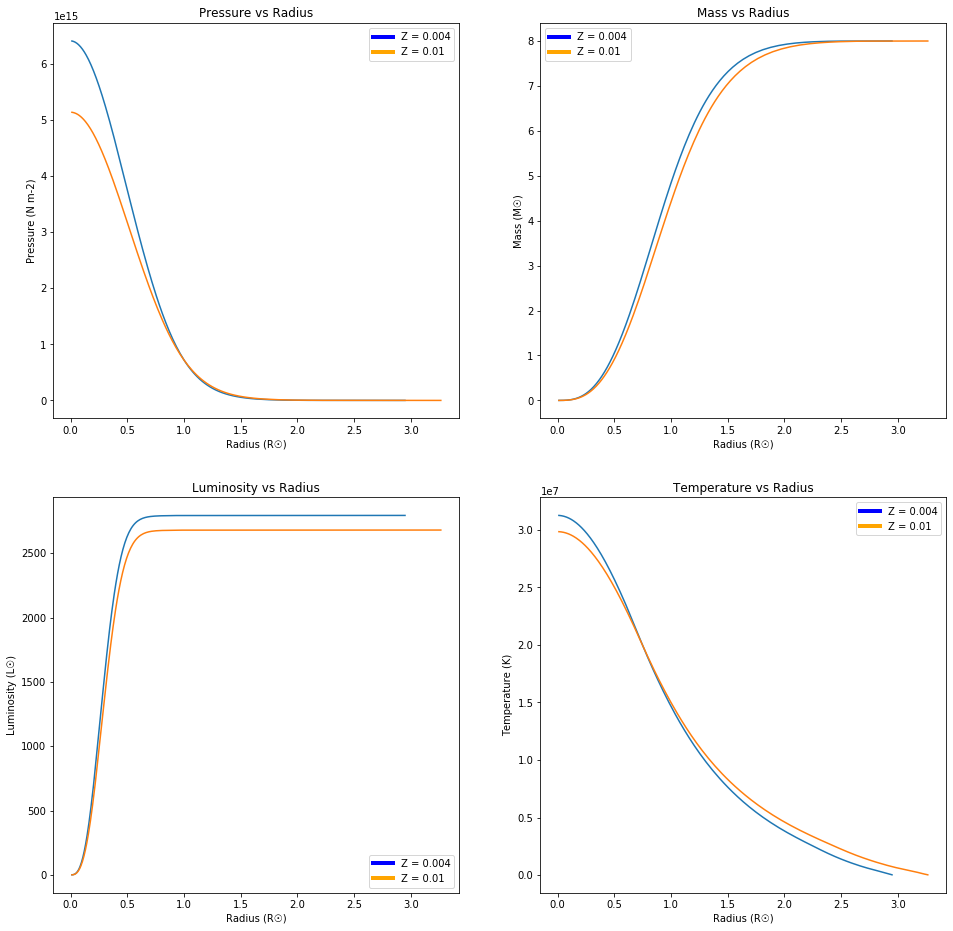

In [21]:
#For the 8M☉
PLOT(M8)

In [22]:
#For the 8M☉
printData(M8)

For Z = 0.004:
Temperature at 99% surface value:  22994445.9 K
Mr/M☉:  0.2297405675 M☉
Temperature at 50% surface value:  29362381.2 K
Mr/M☉:  0.027414788875 M☉
Central Temperature:  31249363.7 K
Central Density:  14200.4663 kg m-3
The convective range is from 0.0116269039 R☉ to 0.692695208 R☉
Central Energy Generation Rate:  2.43280655 W kg-1
Effective/Surface Temperature:  24458.7761 K
Radius:  2.94891623 R☉

For Z = 0.01:
Temperature at 99% surface value:  22252450.2 K
Mr/M☉:  0.21698645 M☉
Temperature at 50% surface value:  28051336.7 K
Mr/M☉:  0.02695344875 M☉
Central Temperature:  29836448.2 K
Central Density:  12074.4574 kg m-3
The convective range is from 0.011802073 R☉ to 0.714775536 R☉
Central Energy Generation Rate:  2.39183876 W kg-1
Effective/Surface Temperature:  23006.171 K
Radius:  3.26455074 R☉


Z = 0.004 has the higher central temperature.
Z = 0.004 has the higher central density.
Z = 0.004 has the higher energy generation.


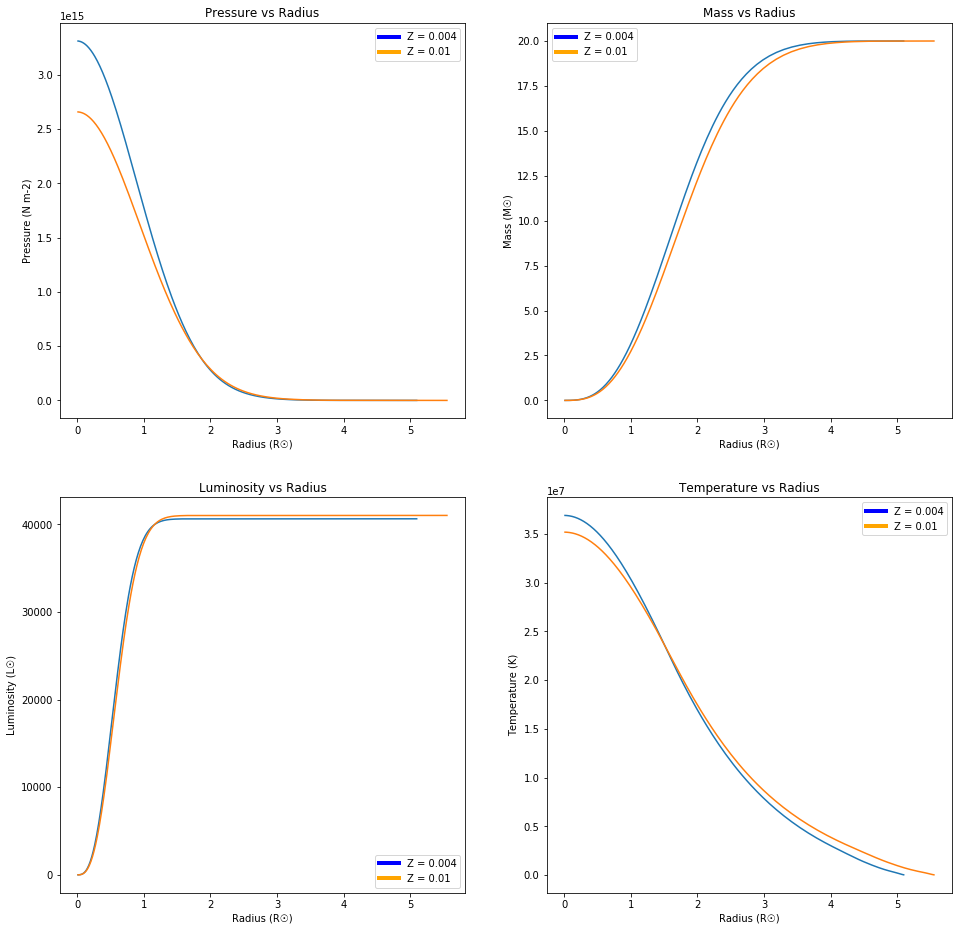

In [23]:
#For the 20M☉
PLOT(M20)

In [24]:
#For the 20M☉
printData(M20)

For Z = 0.004:
Temperature at 99% surface value:  27659464.5 K
Mr/M☉:  0.2524087395 M☉
Temperature at 50% surface value:  34687232.1 K
Mr/M☉:  0.03290340355 M☉
Central Temperature:  36894567.5 K
Central Density:  5545.31702 kg m-3
The convective range is from 0.0130418893 R☉ to 1.57723966 R☉
Central Energy Generation Rate:  11.3712194 W kg-1
Effective/Surface Temperature:  36329.7162 K
Radius:  5.0967915 R☉

For Z = 0.01:
Temperature at 99% surface value:  26512473.2 K
Mr/M☉:  0.2477244495 M☉
Temperature at 50% surface value:  33108494.1 K
Mr/M☉:  0.03224482045 M☉
Central Temperature:  35180194.4 K
Central Density:  4710.38471 kg m-3
The convective range is from 0.0131097991 R☉ to 5.47164784 R☉
Central Energy Generation Rate:  11.6790009 W kg-1
Effective/Surface Temperature:  34894.4897 K
Radius:  5.550795 R☉


Z = 0.004 has the higher central temperature.
Z = 0.004 has the higher central density.
Z = 0.01 has the higher energy generation.


Alpha:  3.5595750522901635


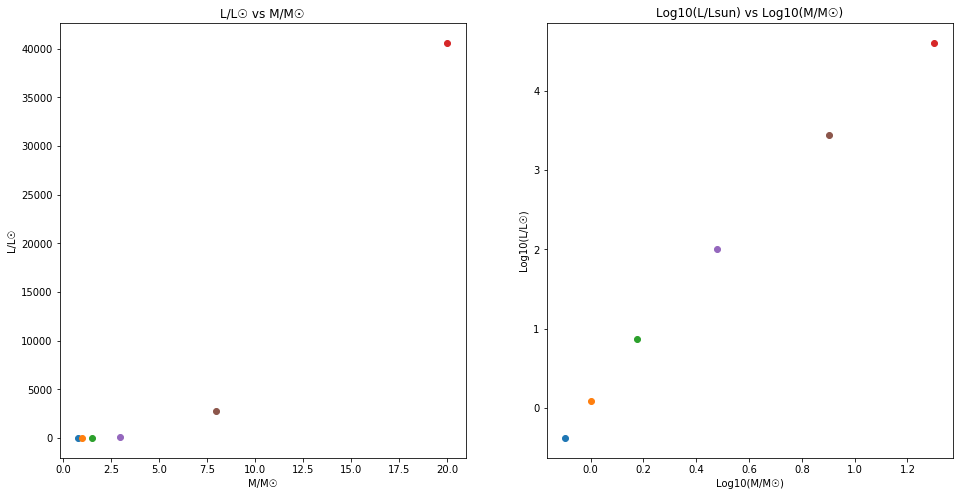

In [25]:
#For z = 0.004
LvsM(Z004)

Alpha:  3.6595206270799157


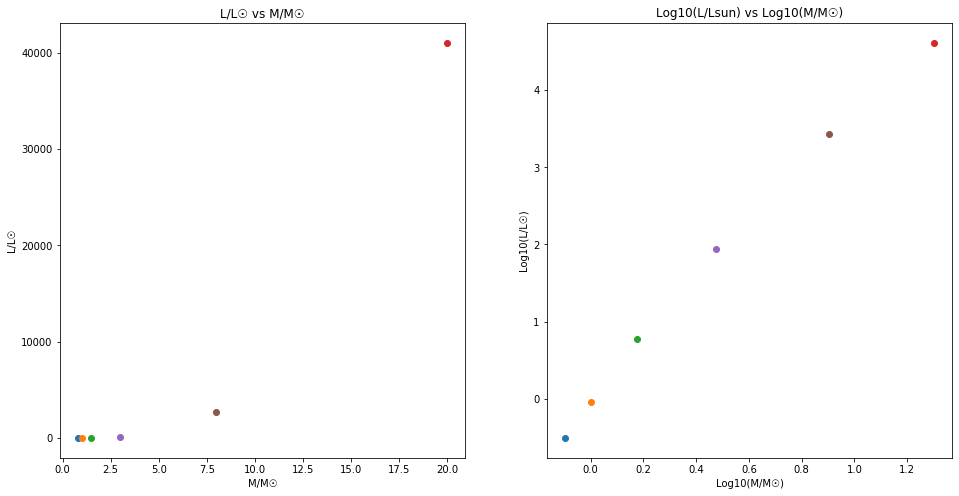

In [26]:
#For z = 0.01
LvsM(Z01)

# DISCUSSION QUESTIONS
### 10.28 (a,c) 
From the graphs, and the plotted info above, we can see that for all but the 20M star the lower metal content wins out in all three catagories (central temperature, central density, and energy generation). Only in the 20M star does the energy generation of the higher metallicity beat out the lower. 
### 10.28 (b)
To explain the results of part a, the reason the lower Z value corresponds to higher values for central temperature, denstiy and energy generation (except for the higher mass star which will be discussed shorty) can be seen when looking at the opacity of the stars, and looking at the Eddington limit (kappa will increase with a lower Z value and so the Luminosity will increase, and therefore the central temperature will increase, and that means there is more nuclear reactions, and so the energy generation will increase).
### 10.28 (d)
We need to consider the Luminosity gradiant when accounting for the differences in luminosity and effective temperature
(which when raised to the fourth power is proportional to the luminosity). The luminoisty gradient is proportinal to the total released energy per kg per sec, and because a lower Z value star has a higher energy generation rate, we can now account for those differences. 

### NOTE:
I noticed the convective ranges were off in the last code that I submitted. These values are a little bit better, and show pretty well that in higher mass stars, the core is highly convective, and the surface is radiative, while for low mass stars, the core is radiative the surface is more convective.